In [1]:
import autograd.numpy as np
from autograd import grad, elementwise_grad, jacobian
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn import datasets
import time


def feedforward(x, P, act_func):
    dim = len(P)
    z = np.array(x)
    
    for i in range(dim):
        z = np.concatenate((z, np.ones((z.shape[0], 1))), axis=1)
        z = act_func[i](z @ P[i])

    return z


def generate_P(dim):
    n = len(dim) - 1
    P = n * [None]
    for i in range(n):
        P[i] = np.random.normal(0, 1, (dim[i] + 1, dim[i + 1]))

    return P

In [14]:
np.random.seed(42)

A = np.random.normal(0, 1, (3,3))
A = (A.T + A)/2
x0 = np.array([1, 0, 0])#np.random.normal(0, 1, 3)

print(np.linalg.eig(A))

def g_trial(t, P, act_func):
    #return np.exp(-t)*x0 +  (1 - np.exp(-t))*feedforward(t, P, act_func)
    return (1-t)*x0 +  t*feedforward(t, P, act_func)


g_trial_t = jacobian(g_trial)


def f(A, x):
    return (x.T@x)*A@x - (x.T@A@x)*x

    

def cost(t, P, act_func):
    x = g_trial(t, P, act_func)
    
    LHS = g_trial_t(t, P, act_func)
    LHS = np.array([LHS[i,:,i].flatten() for i in range(len(t))])
    #print(x)
    RHS = np.array([f(A,i).flatten() for i in x])
    
    #print(RHS[:,:,0])
    #print(LHS)
    
    return np.mean((LHS - RHS)**2)
    

grad = elementwise_grad(cost,1)

(array([3., 1.]), array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]]))


<IPython.core.display.Javascript object>


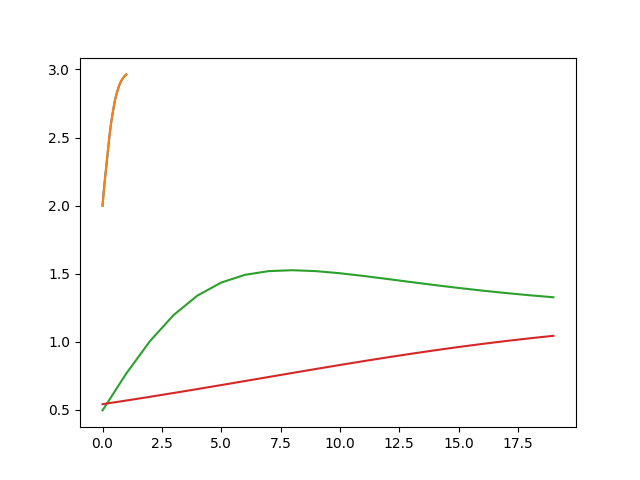

0.0
5.951615760491671
-------------
1.0
1.571497097007143
-------------
2.0
0.23358986079779903
-------------
3.0
0.16099898250896244
-------------
4.0
0.11983381310470897
-------------
5.0
0.09126432541582631
-------------
6.0
0.0711371912027264
-------------
7.0
0.05685275586448836
-------------
8.0
0.0465881169245422
-------------
9.0
0.03907828158270943
-------------
10.0
0.03346737453478127
-------------
11.0
0.029183780919467876
-------------
12.0
0.025845029659484632
-------------
13.0
0.023192130778217766
-------------
14.0
0.021046693948016153
-------------
15.0
0.01928352656320919
-------------
16.0
0.017813135301965183
-------------
17.0
0.016570428617277665
-------------
18.0
0.015507301279130322
-------------
19.0
0.014587676664329082
-------------
20.0
0.01378413112673137
-------------
21.0
0.013075555793847282
-------------
22.0
0.012445511299470158
-------------
23.0
0.011881053461369044
-------------
24.0
0.011371884152255454
-------------
25.0
0.010909729958247141
---

KeyboardInterrupt: 

In [19]:
np.random.seed(42)
%matplotlib notebook

#P = generate_P((1, 100, 50, 2))
act_func = [np.tanh, np.tanh, lambda x: x]


n = 20

t = np.expand_dims(np.linspace(0, 1, n), axis = -1)
t_plot = np.linspace(0, 1, n)

dt = 1/n
x = [np.array([1, 0, 0])]
for i in range(n-1):
    x.append(x[-1] + dt*f(A, x[-1]))
    
x = np.array(x)
v = x
v = v/np.sqrt(np.einsum("ij,ij->i", v, v)[:,np.newaxis])
eig = np.einsum("ij,ij->i", v@A, v)

fig, ax = plt.subplots()
plot, = ax.plot(t_plot, eig)
ax.plot(t_plot, eig)

N = 10000

for i in range(N):
    if i % (N / 100) == 0:
        pass
        print(i / (N / 100))
        print(cost(t, P, act_func))
        print("-------------")
   
    gradient = grad(t, P, act_func)

    P[0] -= 0.0005 * gradient[0]
    P[1] -= 0.0005 * gradient[1]
    P[2] -= 0.0005 * gradient[2]
    
    v = g_trial(t, P, act_func)
    v = v/np.sqrt(np.einsum("ij,ij->i", v, v)[:,np.newaxis])
    eig = np.einsum("ij,ij->i", v@A, v)
    
    plot.set_ydata(eig)
    fig.canvas.draw()
    
    


In [49]:
v = g_trial(t, P, act_func)
    v = v/np.sqrt(np.einsum("ij,ij->i", v, v)[:,np.newaxis])

    print(v)
    eig = np.einsum("ij,ij->i", v@A, v)
    print(eig[-1])
    plt.plot(eig)
    plt.show()

IndentationError: unexpected indent (<ipython-input-49-4beb591b579c>, line 2)

In [42]:
"""
for i in range(N):
    if i % (N / 100) == 0:
        print(i / (N / 100))
        print(cost(t, P, act_func))
        print("-------------")
   
    gradient = grad(t, P, act_func)

    P[0] -= 0.000001 * gradient[0]
    P[1] -= 0.000001 * gradient[1]
    P[2] -= 0.000001 * gradient[2]

print(cost(t, P, act_func))

v = g_trial(np.array([[10]]), P, act_func)
print(v.shape)
print(v@A@v.T/(v@v.T))
"""
"""
for i in range(N):
    if i % (N / 100) == 0:
        print(i / (N / 100))
        print(cost(t, P, act_func))
        print("-------------")
   
    gradient = grad(t, P, act_func)

    P[0] -= 0.0001 * gradient[0]
    P[1] -= 0.0001 * gradient[1]

print(cost(x, P, act_func))
"""


"""
a = 0

g1 = g2 = g3

fig, ax = plt.subplots()
plot, = ax.plot(x, 10*np.exp(-2*x))
ax.plot(x, 10*np.exp(-2*x))

texts = [fig.text(0.5, 0.5 - i * 0.05, '') for i in range(3)]

for i in range(N):
    if i % (N / 100) == 0:
        print(i / (N / 100))
        print(cost(x, P, act_func))
        print("-------------")
    plot.set_ydata(g_trial(x, P, act_func))
   

    gradient = grad(x, P, act_func)
    g1 = gradient[0] + a * g1
    g2 = gradient[1] + a * g2
    g3 = gradient[2] + a * g3
    
    values = [f"{np.mean(np.abs(g1))}", f"{np.mean(np.abs(g2))}", f"{np.mean(np.abs(g3))}"]    
    [txt.set_text(str(val)) for txt, val in zip(texts, values)]
    fig.canvas.draw()

    P[0] -= 0.0001 * g1
    P[1] -= 0.0001 * g2
    P[2] -= 0.0001 * g3

print(cost(x, P, act_func))
"""
def func(t):
    return np.array([np.sin(t), np.cos(t)])

dfunc = jacobian(func, 0)

t = np.array([0.2, 0.3])
print(dfunc(t))

[[[ 0.98006658  0.        ]
  [ 0.          0.95533649]]

 [[-0.19866933  0.        ]
  [ 0.         -0.29552021]]]


<IPython.core.display.Javascript object>


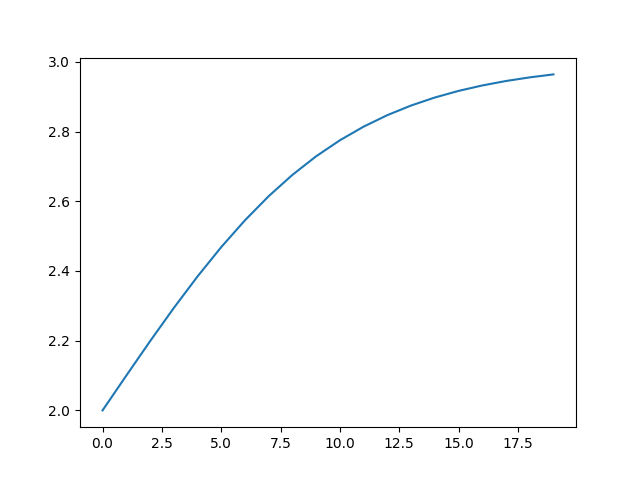

In [24]:
%matplotlib notebook
def f(A, x):
    return (x.T@x)*A@x - (x.T@A@x)*x

def ray_quo(A, x):
    x = x/np.sqrt(np.einsum("ij,ij->i", x, x)[:,np.newaxis])
    eig = np.einsum("ij,ij->i", x@A, x)
    return eig



A = np.array([[2,1], [1,2]])
t = np.linspace(0, 1, n)

dt = 1/n
x = [np.array([1, 0])]
for i in range(n-1):
    x.append(x[-1] + dt*f(A, x[-1]))
    
x = np.array(x)

eig = ray_quo(A, x)
plt.plot(eig)
plt.show()  